In [1]:
# Import needed files and basic setup
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import data_gen2
import tropical

from ipywidgets import Output
from IPython.display import display, Markdown, Latex, Math, clear_output

%matplotlib notebook
#plt.ion()

%load_ext tikzmagic

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # I don't have a GPU to test this

In [ ]:
a = 1
bOuter = -1
bInner = 1
w = np.array([[1.0], [1.0]])

def network(x):
    return a*np.maximum(np.matmul(w.T, x) + bInner, 0) + bOuter

We have

$ f(x) = a \max \left\{ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, 0 \right\} + b_2 $

This has a nonlinear part at

$ w_1 x_1 + w_2 x_2 + b_1 = 0 $

or

$ x_2 = \frac{\displaystyle-w_1 x_1 - b_1}{\displaystyle w_2}. $

If we care about positive negative classification, 

If we care about positive negative classification, this crosses the zero hyperplane at

$ 0 = a \max \left\{ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, 0 \right\} + b_2 $

or

$ - \frac{\displaystyle b_2}{\displaystyle a} = \max \left\{ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, 0 \right\} $

There are now two options:

When $w_1 x_1 + w_2 x_2 + b_1 > 0$, we have

$ -\frac{\displaystyle b_2}{\displaystyle a} = w_1 x_1 + w_2 x_2 + b_1 $

or

$ x_2 = \frac{\displaystyle -a w_1 x_1 - a b_1 - b_2}{\displaystyle  a w_2}. $

When $w_1 x_1 + w_2 x_2 + b_1 < 0$, we have

$ - \frac{\displaystyle b_2}{\displaystyle a} = 0 $

which only occurs when 

$b_2 = 0$

independent of $x$.

Converting this to tropical form gives

\begin{align*}
f(x) &= (a^+ - a^-) \left( \max \left\{ \begin{bmatrix} w_1^+ & w_2^+ \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, \begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right\} - \begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right) + b_2 \\
&= \left(a^+ \max \left\{ \begin{bmatrix} w_1^+ & w_2^+ \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, \begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right\} + a^-\begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\right) - \\
&\phantom{=} - \left(a^- \max \left\{ \begin{bmatrix} w_1^+ & w_2^+ \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + b_1, \begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \right\} + a^+ \begin{bmatrix} w_1^- & w_2^- \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\right)
\end{align*}

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

x, y = np.meshgrid(x, y)
X = x.reshape([-1, 1])
Y = y.reshape([-1, 1])

into = np.concatenate((X, Y), axis=1)

out = network(into.T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, out.reshape(x.shape), rstride=8, cstride=8);

x = np.array([-10, 10])
y = (-w[0]*x - bInner)/w[1]
ax.plot(x, y, zs=np.array([bOuter, bOuter]), color='r')

x = np.array([-10, 10])
y = (-a*w[0]*x - a*bInner - bOuter)/(a*w[1])
ax.plot(x, y, zs=np.array([0, 0]), color='k')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1]);

In [37]:
a = np.array([[2.0], [-4.0]]).T

bOuter = np.array(-1)

bInner = np.array([[0.0], 
                   [-1.0]])

w = np.array([[1.0, 1.0], 
              [1.0, 1.0]])

def network(x):
    return np.matmul(a, np.maximum(np.matmul(w, x) + bInner, 0)) + bOuter

<IPython.core.display.Javascript object>


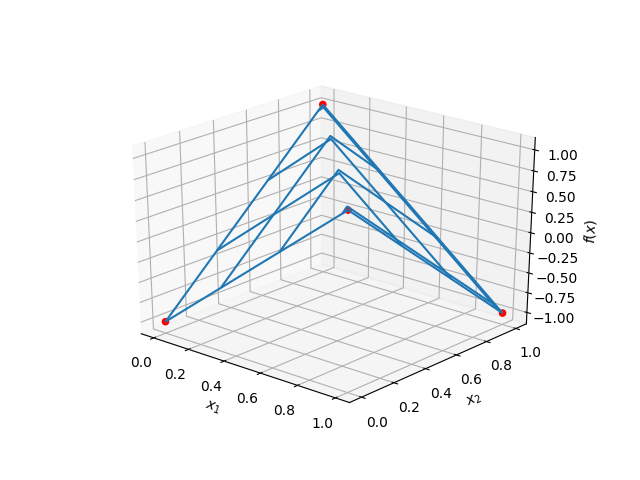

In [42]:
x = np.array([0, 1])
y = np.array([0, 1])

x, y = np.meshgrid(x, y)
X = x.reshape([-1, 1])
Y = y.reshape([-1, 1])

into = np.concatenate((X, Y), axis=1)

out = network(into.T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array([0, 1])
y = np.array([0, 1])

x, y = np.meshgrid(x, y)
X = x.reshape([-1, 1])
Y = y.reshape([-1, 1])

into = np.concatenate((X, Y), axis=1)

out = network(into.T)
ax.scatter(X, Y, out, c='r', alpha=1);



x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

x, y = np.meshgrid(x, y)
X = x.reshape([-1, 1])
Y = y.reshape([-1, 1])

into = np.concatenate((X, Y), axis=1)

out = network(into.T)
ax.plot_wireframe(x, y, out.reshape(x.shape), rstride=32, cstride=32);

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$');

#ax.plot([0, 1], [1, 0], zs=[-1, -1], c='k')
#ax.plot([0, 1], [-1, -2], zs=[-1, -1], c='k')

In [39]:
Fterms, Gterms = tropical.getTropCoeffs(w, bInner, a, bOuter)

In [40]:
display(Math(tropical.displayTropPoly(Fterms)))

<IPython.core.display.Math object>

In [41]:
display(Math(tropical.displayTropPoly(Gterms)))

<IPython.core.display.Math object>